<a href="https://colab.research.google.com/github/EWECORP/DScience_41870/blob/main/Data_Wrangling_Eduardo_Ettlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

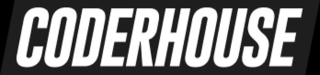

# **CURSO DE DATA SCIENCE**

# **DATA WRANGLING**

# **DESAFIO N° 8 - DATA WRANGLING**

*AUTOR:Eduardo ETTLIN

# <b> Conectamos el Drive e importamos lo necesario para trabajar.

In [2]:
#Importamos Pandas
import pandas as pd
#Importamos NumPY
import numpy as np
#Importamos Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#Conectamos mi drive
from google.colab import drive
#Importamos OS
import os
#Montamos drive
drive.mount('/content/gdrive', force_remount=True)
# Establecer ruta de acceso en drive
import os
print(os.getcwd())


Mounted at /content/gdrive
/content


In [3]:
os.chdir("/content/gdrive/MyDrive/DScience_41870")
print(os.getcwd())

/content/gdrive/MyDrive/DScience_41870


# Lectura de archivos

In [4]:
datos=pd.read_csv('/content/gdrive/MyDrive/DScience_41870/US_Accidents_Dec21_updated.csv',sep=',')
datos.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
print(datos.shape)

(2845342, 47)


# Exploracion dataset



In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

# Borrado de columnas

In [7]:
# Trato de evitar el uso excesivo de memoria y borro algunas columnas
col_del = ['Start_Lat', 'Start_Lng','End_Lat', 'End_Lng','Zipcode', 'Country', 'Timezone', 'Airport_Code'] # Columnas a borrar que no aportan

In [8]:
# Borrar variables
datos=datos.drop(labels=col_del, axis=1) # Borrando las columnas en col_del
datos.columns # Verificando las columnas que quedaron

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# Borrado de duplicados

In [9]:
print(datos.shape)
datos= datos.drop_duplicates()
print(datos.shape)

(2845342, 39)
(2845342, 39)


# Analisis de nulos (OJO)

In [10]:
# Columnas con porcentaje de nulos
pd.set_option('display.max_rows', None)  # or 1000
serie=(datos.isnull().sum()/datos.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
City                      0.004815
Street                    0.000070
dtype: float64

<Axes: >

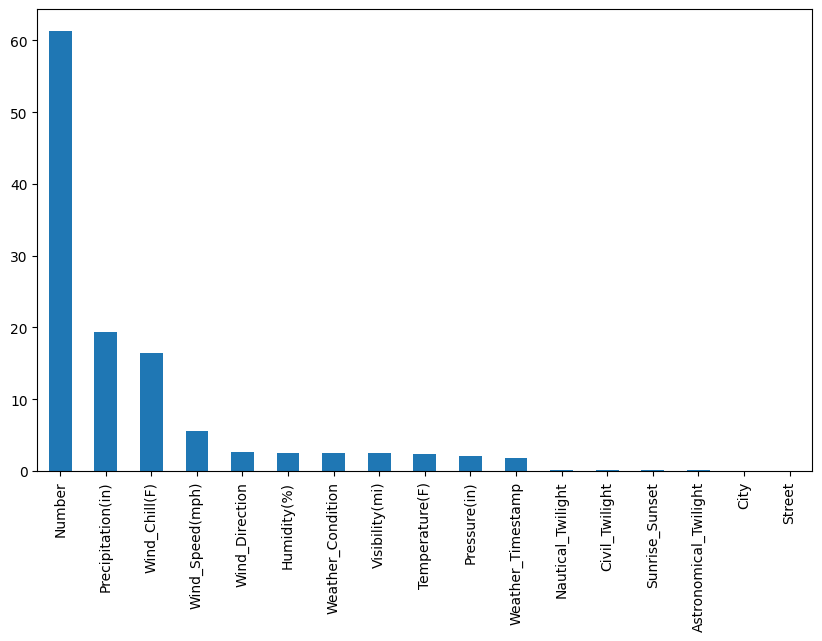

In [11]:
# Ver Graficamente la amyor cantidad de nulos Top 10
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
serie.plot(kind='bar')

## Donde estáan los datos Nulos

Utilizo la Libreria de MISSINGNO para poder ver en forma gráfica la presencia de NULOS en el dataset datos. Esto me da una idea de lo que voy a enfrentar en las futuras etapas


In [12]:
pip install missingno  -q # quiet mode

<Axes: >

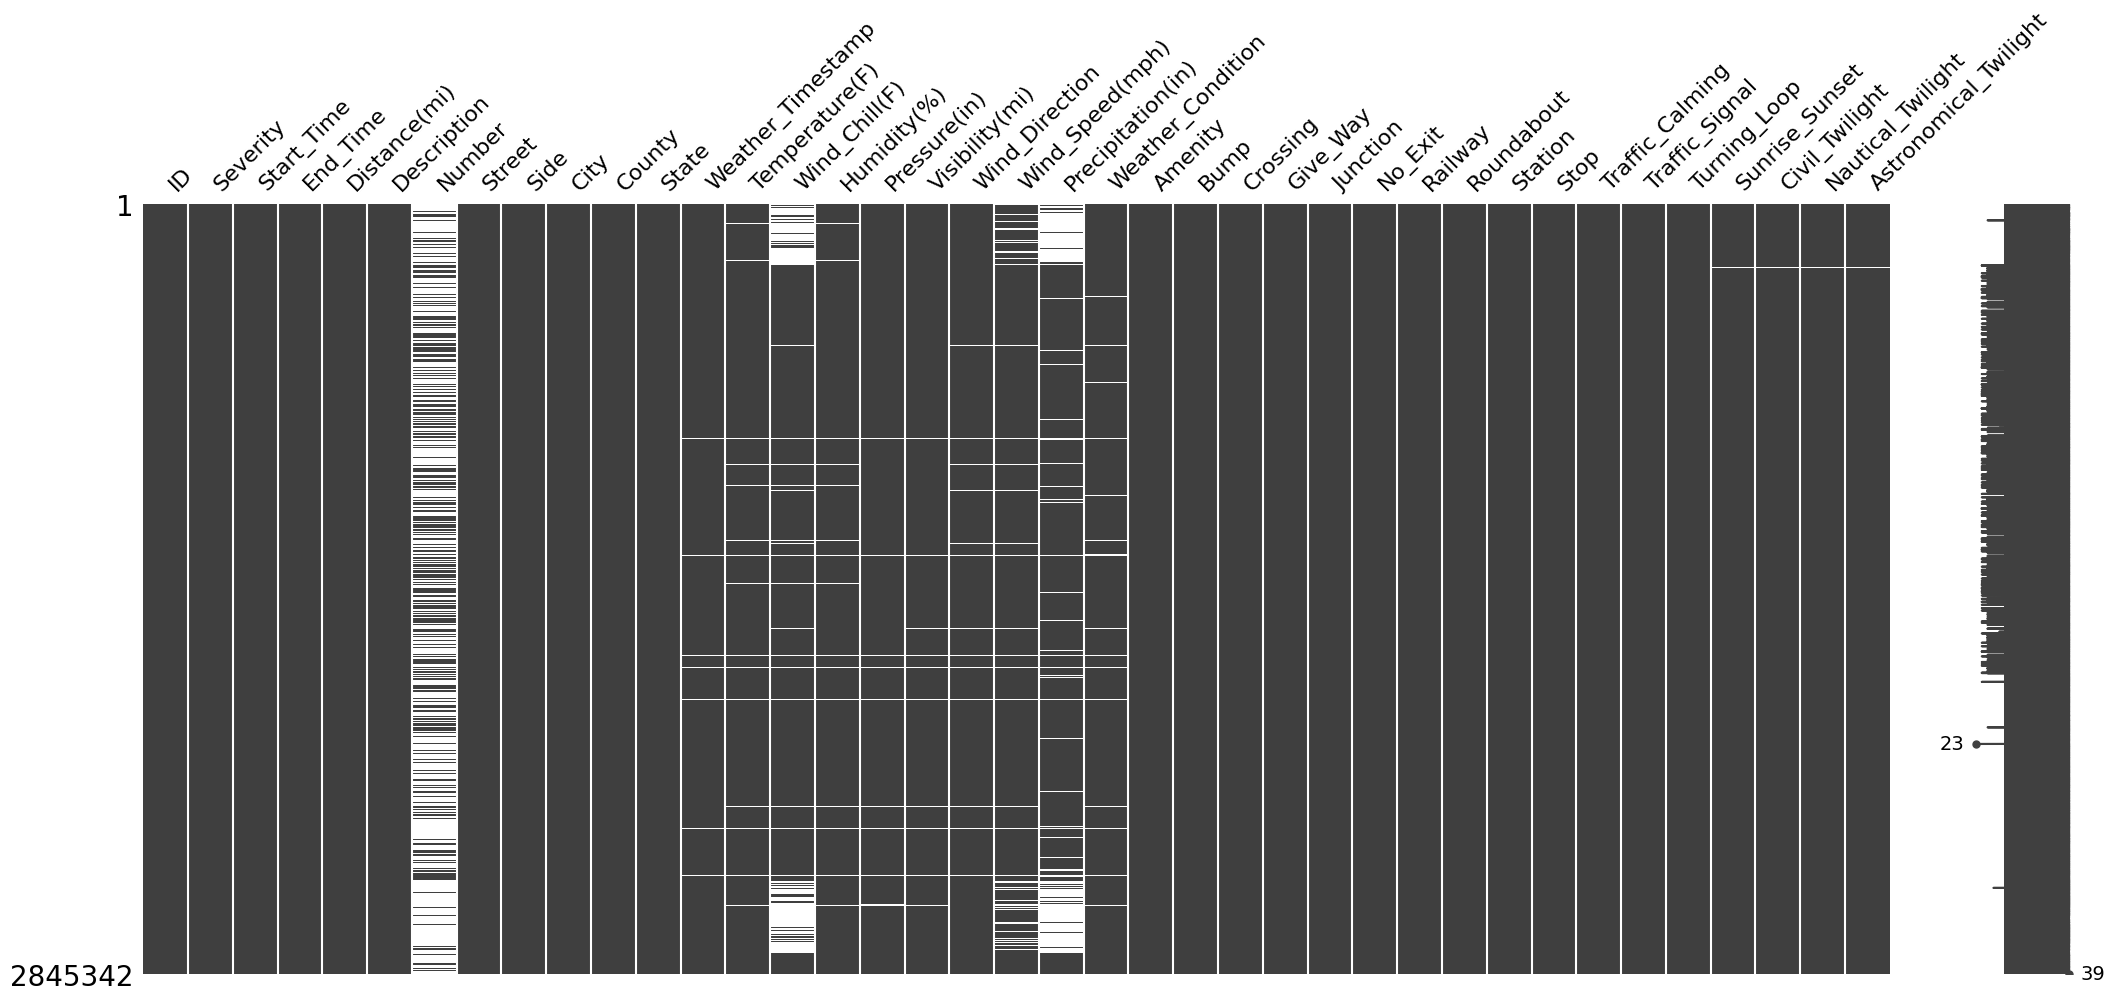

In [13]:
import missingno as msno
msno.matrix(datos)

### Hago una correlación preliminar de los datos para entenderlos un poco mejor
  

<Axes: >

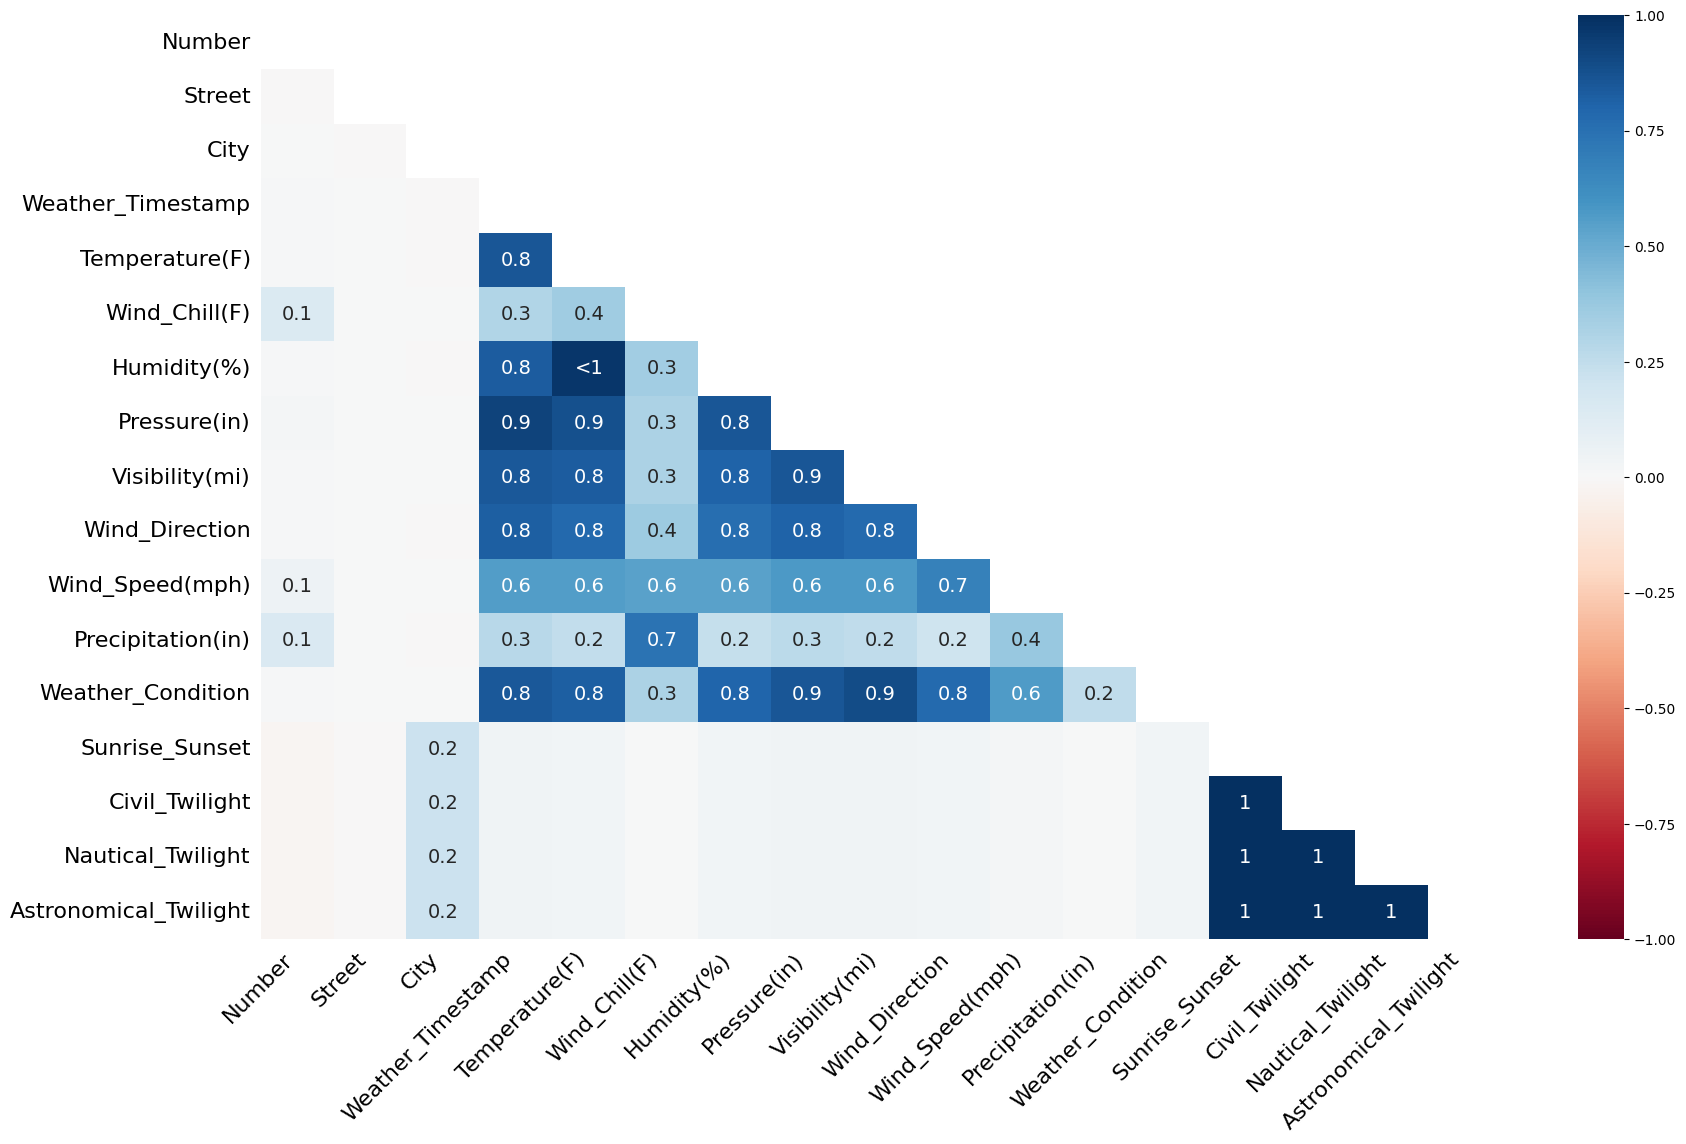

In [14]:
msno.heatmap(datos)

## El uso de dendrogram me permite ver una primera agrupación jerárquica de los datos que se representa en forma de arbol.

<Axes: >

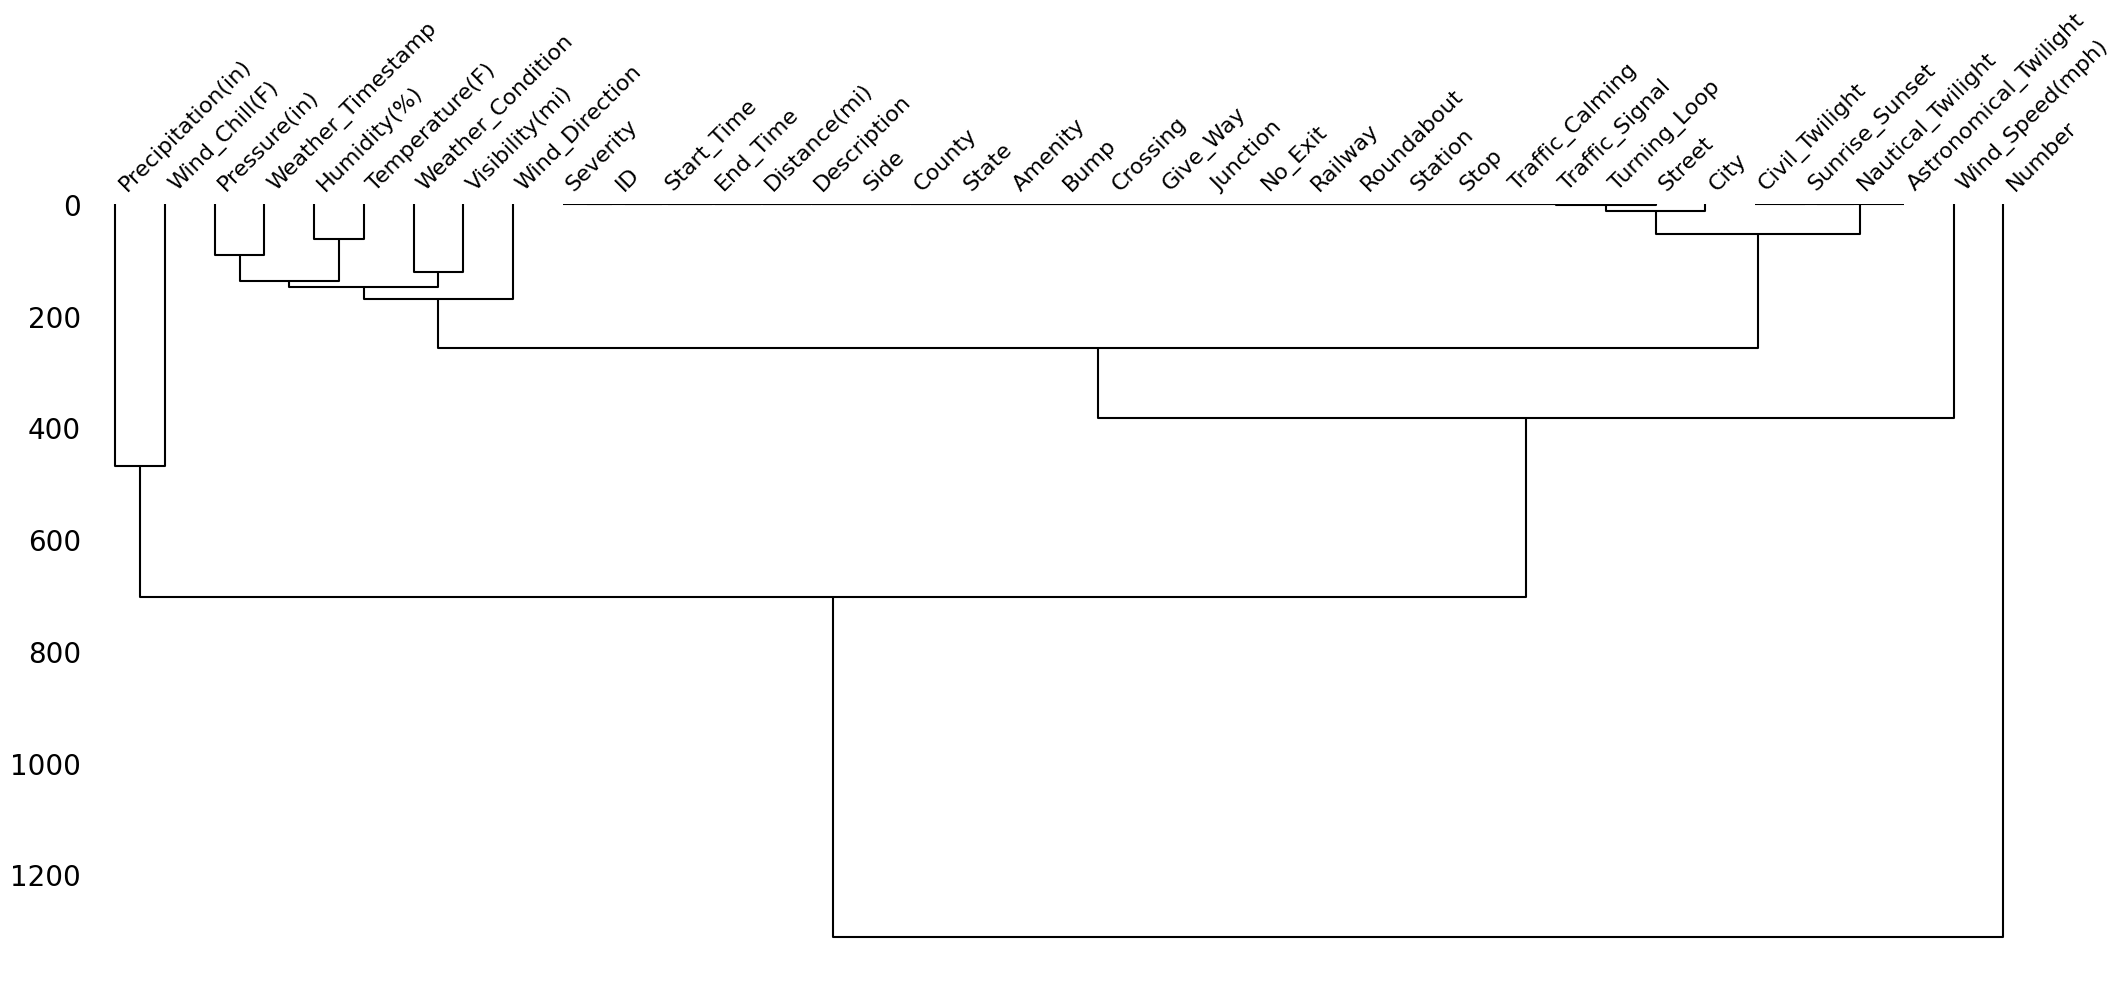

In [15]:
msno.dendrogram(datos)

Comenzar a mirar las variables con mayor cantidad de nulos y explorar si tienen algo que aportar

In [ ]:
datos.Number.value_counts() # Decision: borrar

In [16]:
datos.Severity.value_counts() # Decision: RELEVANTE No Borrar

2    2532991
3     155105
4     131193
1      26053
Name: Severity, dtype: int64

In [17]:
datos.Wind_Direction.value_counts() # Decisión:

CALM        433622
S           169743
W           167830
WNW         145046
NW          141344
SSW         137282
WSW         130734
SW          128970
SSE         125516
NNW         124583
E           123904
N           123517
SE          109512
VAR         104182
ESE         102612
ENE          94801
NE           88704
NNE          84991
Calm         76534
West         39239
South        39175
North        34378
East         23119
Variable     22229
Name: Wind_Direction, dtype: int64

# Borrado de columnas - del Data Frame


In [18]:
# col_del=['PoolQC','MiscFeature','Alley','Fence','Id'] # Columnas a borrar que no aportan
col_del = [ 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station','Sunrise_Sunset', 'Astronomical_Twilight'] # Columnas a borrar que no aportan


# Borrar variables
datos=datos.drop(labels=col_del, axis=1) # Borrando las columnas en col_del
datos.columns # Verificando las columnas que quedaron

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop', 'Civil_Twilight',
       'Nautical_Twilight'],
      dtype='object')

In [22]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2845342 entries, 0 to 2845341
Data columns (total 28 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Severity           int64  
 2   Start_Time         object 
 3   End_Time           object 
 4   Distance(mi)       float64
 5   Description        object 
 6   Number             float64
 7   Street             object 
 8   Side               object 
 9   City               object 
 10  County             object 
 11  State              object 
 12  Weather_Timestamp  object 
 13  Temperature(F)     float64
 14  Wind_Chill(F)      float64
 15  Humidity(%)        float64
 16  Pressure(in)       float64
 17  Visibility(mi)     float64
 18  Wind_Direction     object 
 19  Wind_Speed(mph)    float64
 20  Precipitation(in)  float64
 21  Weather_Condition  object 
 22  Stop               bool   
 23  Traffic_Calming    bool   
 24  Traffic_Signal     bool   
 25  Turning_Loop      

In [23]:
datos.shape

(2845342, 28)

# Llenar con la mediana

In [28]:
#col_inter= ['LotFrontage','GarageYrBlt','MasVnrArea'] # Columnas a interpolar

#for i in col_inter: # reemplazar por la mediana en las columnas numericas en col_inter
#  datos[i] = datos[i].fillna(datos[i].median())

# Llenar con categoria desconocido

In [27]:
datos.Number.isnull().sum() # Verificando que funciona

1743911

In [30]:
col_cat= ['Number'] # Columnas categóricas

In [31]:
for i in col_cat: # Reemplazar los vacios por Desconocido
  datos[i] = datos[i].fillna('Desconocido')

In [32]:
datos.Number.isnull().sum() # Verificando que funciona

0

In [33]:
#Relleno con valor 0 otras categorías
col_cat_2= ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)','Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)','Precipitation(in)'] # Columnas categoricas


In [34]:
for i in col_cat_2: # Reemplazar los vacios por Desconocido
  datos[i] = datos[i].fillna(0)


In [35]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2845342 entries, 0 to 2845341
Data columns (total 26 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Severity           int64  
 2   Start_Time         object 
 3   End_Time           object 
 4   Distance(mi)       float64
 5   Description        object 
 6   Number             object 
 7   Street             object 
 8   Side               object 
 9   City               object 
 10  County             object 
 11  State              object 
 12  Weather_Timestamp  object 
 13  Temperature(F)     float64
 14  Wind_Chill(F)      float64
 15  Humidity(%)        float64
 16  Pressure(in)       float64
 17  Visibility(mi)     float64
 18  Wind_Direction     object 
 19  Wind_Speed(mph)    float64
 20  Precipitation(in)  float64
 21  Weather_Condition  object 
 22  Stop               bool   
 23  Traffic_Calming    bool   
 24  Traffic_Signal     bool   
 25  Turning_Loop      

## Verifico si Funcionaron los reemplazos

In [24]:
datos.Temperature.isnull().sum() # Verificando que funciona  # ETSO NO ME FUNCIONA, DICE QUE NO HAY ATRIBUTO Temperature ?????
#datos.Pressure.isnull().sum()# Verificando que funciona

AttributeError: ignored

In [19]:
datos.Nautical_Twilight.value_counts()

Day      2063472
Night     779003
Name: Nautical_Twilight, dtype: int64

# ENRIQUECER con CAMPOS del Trabajo Anterior

In [28]:
datos['Hora'] = pd.to_datetime( datos['Start_Time'],format='%Y-%m-%d %H:%M:%S').dt.hour  # Extraer la HORA del Día en la cual ocurrió el accidente
datos['Anio_Mes'] =  pd.to_datetime( datos['Start_Time'],format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m')  # Extraer AÑO y MES
datos['day_of_week'] = pd.to_datetime( datos['Start_Time'],format='%Y-%m-%d %H:%M:%S').dt.dayofweek  # Dia de la Semana

days = {0:'Lunes',1:'Martes',2:'Miércoeles',3:'Jueves',4:'Viernes',5:'Sabado',6:'Domingo'}   # Nombre del Día de la Semana
datos['day_of_week_lbl'] = datos['day_of_week'].apply(lambda x: days[x])
datos['Trimestre'] = pd.to_datetime(datos['Start_Time']).dt.quarter

datos.head(3)


,ID,Severity,Start_Time,End_Time,Distance(mi),Description,Number,Street,Side,City,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Civil_Twilight,Nautical_Twilight,Hora,Anio_Mes,day_of_week,day_of_week_lbl,Trimestre
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,1.619704,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,...,False,False,False,Night,Night,0,2016-02,0,Lunes,1
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,0.028405,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,...,False,False,False,Night,Night,5,2016-02,0,Lunes,1
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,-0.415082,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,...,False,False,False,Night,Night,6,2016-02,0,Lunes,1
